In [1]:
from gravhopper import Simulation, IC
from astropy import units as u
import matplotlib.pyplot as plt
from pynbody.analysis.profile import Profile
import numpy as np

  Referenced from: <85EFA90A-BE88-35A7-AD9E-F20432CD4AFA> /opt/anaconda3/lib/libgsl.25.dylib
  Reason: tried: '/opt/anaconda3/lib/libcblas.3.dylib' (no such file), '/opt/anaconda3/lib/python3.12/site-packages/../../libcblas.3.dylib' (no such file), '/opt/anaconda3/lib/python3.12/site-packages/../../libcblas.3.dylib' (no such file), '/opt/anaconda3/lib/python3.12/lib-dynload/../../libcblas.3.dylib' (no such file), '/opt/anaconda3/bin/../lib/libcblas.3.dylib' (no such file), '/usr/local/lib/libcblas.3.dylib' (no such file), '/usr/lib/libcblas.3.dylib' (no such file, not in dyld cache)'


In [3]:
sim = Simulation(dt=5e3*u.yr, eps=0.05*u.pc)
Plummer_IC = IC.Plummer(N=5000, b=1*u.pc, totmass=1e5*u.Msun)

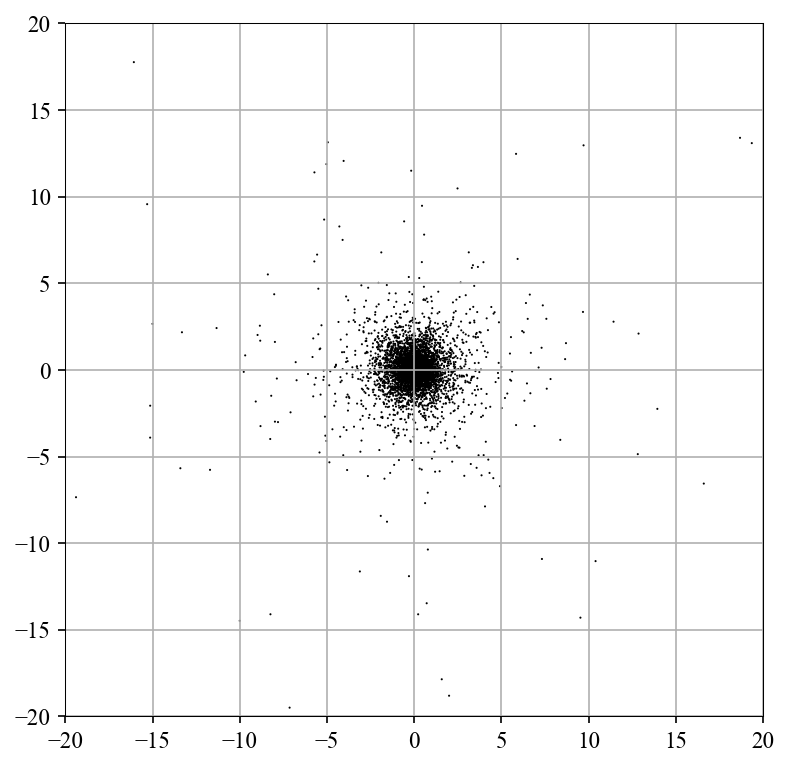

In [4]:
plt.figure(figsize=(6,6), dpi=150)
plt.scatter(*Plummer_IC['pos'].T[::2], s=1)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.grid(True)

(-80.0, 80.0)

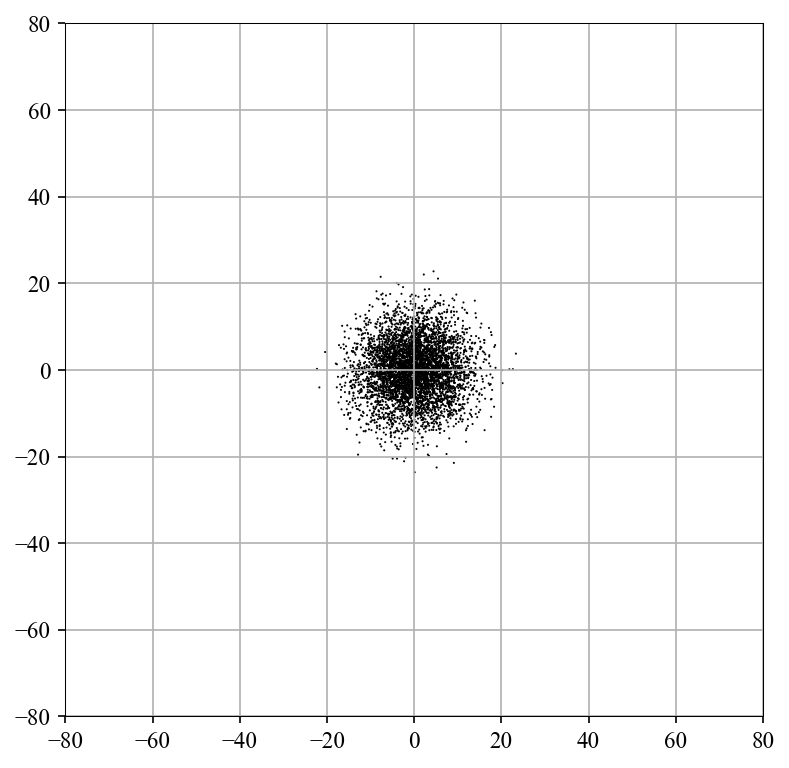

In [5]:
plt.figure(figsize=(6,6), dpi=150)
plt.scatter(*Plummer_IC['vel'].T[::2], s=1)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-80, 80)

In [6]:
Plummer_IC['mass']

<Quantity [20., 20., 20., ..., 20., 20., 20.] solMass>

In [7]:
sim.add_IC(Plummer_IC)
sim.run(400)

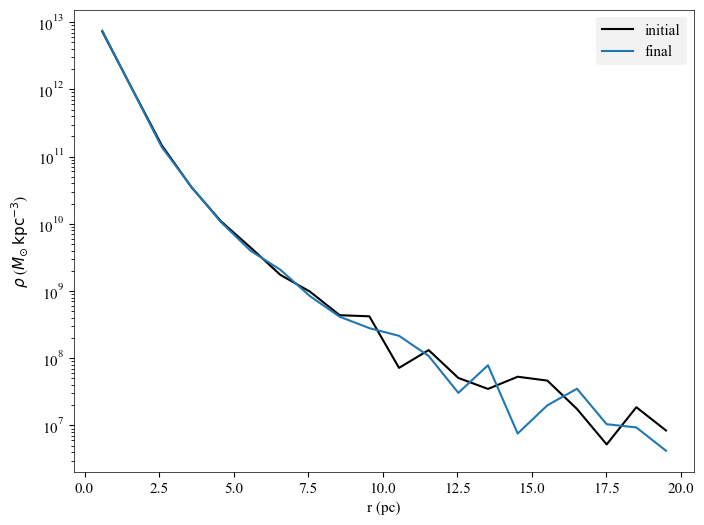

In [8]:
# Plot density profile before and after
s_IC = sim.pyn_snap(timestep=0)
s_final = sim.pyn_snap()
p_IC = Profile(s_IC, ndim=3, min=0.0001, max=0.02, nbins=20)
p_final = Profile(s_final, ndim=3, min=0.0001, max=0.02, nbins=20)
plt.plot(p_IC['rbins'].in_units('pc'), p_IC['density'], label='initial')
plt.plot(p_final['rbins'].in_units('pc'), p_final['density'], label='final')
plt.yscale('log')
plt.xlabel('r (pc)')
plt.ylabel(f'$\\rho$ (${p_IC["density"].units.latex()}$)')
plt.legend()

In [9]:
print(s_IC)

<SimSnap "<created>" len=5000>


In [10]:
sim.times

<Quantity [0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
           0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
           0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
           0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
           0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
           0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
           0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
           0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
           0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
           0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
           0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
           0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
           0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
           0.585, 0.59 , 0.595, 0.6  ,

In [11]:
sim.velocities

<Quantity [[[  4.24703485,   1.44889248,  -4.53735243],
            [  1.32467129,  -5.40860422,  -8.6936694 ],
            [ -4.8181404 ,   6.58764688,   3.56216873],
            ...,
            [  1.10720915,   2.32479238,  -2.81814622],
            [  1.48278698,   2.38015308,  13.30087752],
            [ -8.31648703,  -7.37277079,   5.18101252]],

           [[  4.14116531,   1.48529932,  -4.59293345],
            [  1.62543039,  -5.05419994,  -9.28724326],
            [ -4.79267642,   5.80489726,   3.60440813],
            ...,
            [  0.95132474,   2.1345552 ,  -2.338661  ],
            [  1.44458983,   2.09697673,  12.90485825],
            [ -8.24753543,  -7.49309402,   4.93344956]],

           [[  4.03599484,   1.52080053,  -4.64723017],
            [  1.86061095,  -4.71836094,  -9.76946154],
            [ -4.6975701 ,   5.0807722 ,   3.50437451],
            ...,
            [  0.78775272,   1.95485404,  -1.87652589],
            [  1.39601548,   1.84156199,  12.5398

In [12]:
1e6/5000

200.0

In [13]:
sim.masses

<Quantity [20., 20., 20., ..., 20., 20., 20.] solMass>

In [14]:
import plotly.graph_objects as go

# Get snapshots at regular intervals
n_frames = 20
frame_indices = np.linspace(0, len(sim.times) - 1, n_frames, dtype=int)

# Sample every nth particle
particle_step = 10

# Determine axis limits from all frames
all_coords = []
for idx in frame_indices:
    snap = sim.pyn_snap(timestep=idx)
    all_coords.extend(snap['x'][::particle_step])
    all_coords.extend(snap['y'][::particle_step])
    all_coords.extend(snap['z'][::particle_step])
max_range = max(abs(min(all_coords)), abs(max(all_coords))) * 0.3

# Create frames for animation
frames = []
for i, idx in enumerate(frame_indices):
    snap = sim.pyn_snap(timestep=idx)
    x = snap['x'][::particle_step]
    y = snap['y'][::particle_step]
    z = snap['z'][::particle_step]
    
    frames.append(go.Frame(
        data=[go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(size=2, color='black', opacity=0.6)
        )],
        name=str(i)
    ))

# Initial data
snap_init = sim.pyn_snap(timestep=0)
x0 = snap_init['x'][::particle_step]
y0 = snap_init['y'][::particle_step]
z0 = snap_init['z'][::particle_step]

# Create figure
fig = go.Figure(
    data=[go.Scatter3d(
        x=x0, y=y0, z=z0,
        mode='markers',
        marker=dict(size=2, color='black', opacity=0.6)
    )],
    layout=go.Layout(
        title='Plummer Sphere Evolution',
        scene=dict(
            xaxis_title='x (kpc)',
            yaxis_title='y (kpc)',
            zaxis_title='z (kpc)',
            xaxis=dict(range=[-max_range, max_range]),
            yaxis=dict(range=[-max_range, max_range]),
            zaxis=dict(range=[-max_range, max_range]),
            aspectmode='cube'
        ),
        updatemenus=[dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(label='Play',
                     method='animate',
                     args=[None, dict(frame=dict(duration=100, redraw=True),
                                      fromcurrent=True, mode='immediate')]),
                dict(label='Pause',
                     method='animate',
                     args=[[None], dict(frame=dict(duration=0, redraw=False),
                                        mode='immediate')])
            ]
        )],
        sliders=[dict(
            steps=[dict(method='animate',
                        args=[[str(i)], dict(mode='immediate',
                                             frame=dict(duration=100, redraw=True))],
                        label=str(i)) for i in range(len(frames))],
            active=0,
            transition=dict(duration=0),
            currentvalue=dict(prefix='Frame: ')
        )]
    ),
    frames=frames
)

fig.show()

In [15]:
import astropy.units as u
import astropy.constants as c

In [16]:
c.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

G is in units $\left [\frac{L^3}{M t^2} \right ]$

if we set $G_{\text{in}} = 1$, then

$G_{\text{in}}  = G_{\text{SI}}\frac{M_{\text{unit}} t_{\text{unit}}^2}{L_{\text{unit}}^3}$

In [17]:
# Assuming G_in = 1
G_in = 1
G_si = c.G
L_unit = 100 * u.pc
M_unit = 1e4 * u.Msun
t_unit = np.sqrt(G_in * (L_unit**3) / (M_unit * G_si)).to(u.Myr)

In [18]:
t_unit.to(u.Myr)

<Quantity 149.09601426 Myr>

In [19]:
input = 200 * u.km/u.s 
(input / L_unit).decompose()

<Quantity 6.48155858e-14 1 / s>

In [20]:
input.unit.physical_type == 'speed'

True

# Merger

In [175]:
from galpy.potential import NFWPotential
from galpy.df import isotropicNFWdf
totalMass = 1e7 *u.Msun
nfw = NFWPotential(amp = totalMass , a=(0.1*u.kpc))
nfwdf = isotropicNFWdf(pot = nfw)
n_pts = 10000
masses = np.ones(n_pts) * totalMass/n_pts
sample =  nfwdf.sample(n=n_pts)

In [176]:
dt = 5e5 * u.yr
n_steps = 400
ts = np.linspace(0, n_steps*dt, n_steps)

In [177]:
q = np.zeros((n_pts, 3)) 
v = np.zeros((n_pts, 3)) 
q[:,0] = sample.x()
q[:,1] = sample.y()
q[:,2] = sample.z()
v[:,0] = sample.vx()
v[:,1] = sample.vy()
v[:,2] = sample.vz()
v *= u.km / u.s
q *= u.kpc

In [178]:
mask = ~np.isnan(q).any(axis=1) & ~np.isnan(v).any(axis=1)
q = q[mask]
v = v[mask]
masses = masses[mask]

In [179]:
sat1 = {'pos': q, 'vel': v, 'mass': masses}

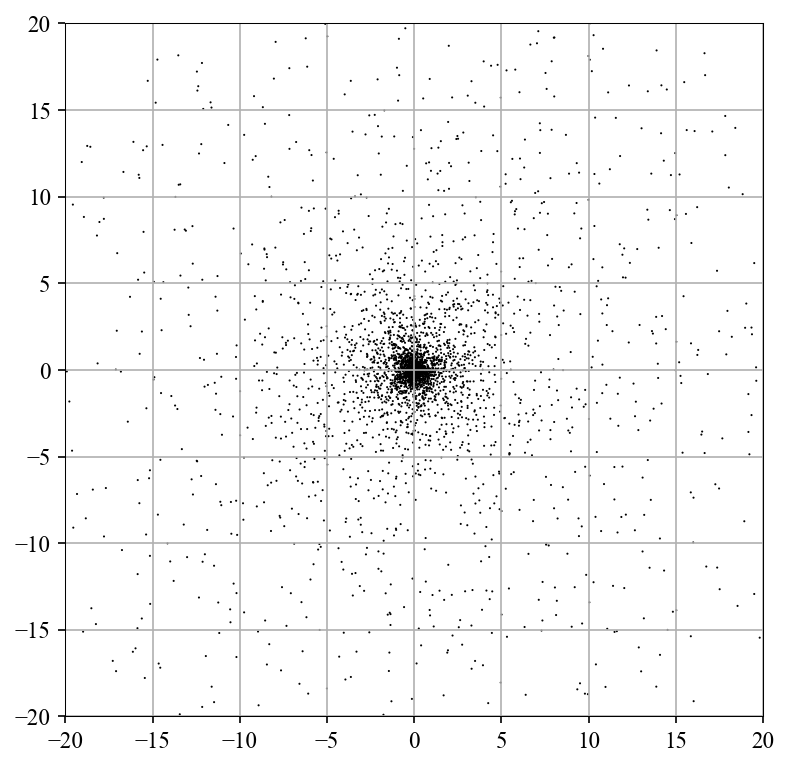

In [180]:
plt.figure(figsize=(6,6), dpi=150)
plt.scatter(*sat1['pos'].T[::2], s=1)
# plt.scatter(*Plummer_IC['pos'].T[::2], s=1)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.grid(True)

(-80.0, 80.0)

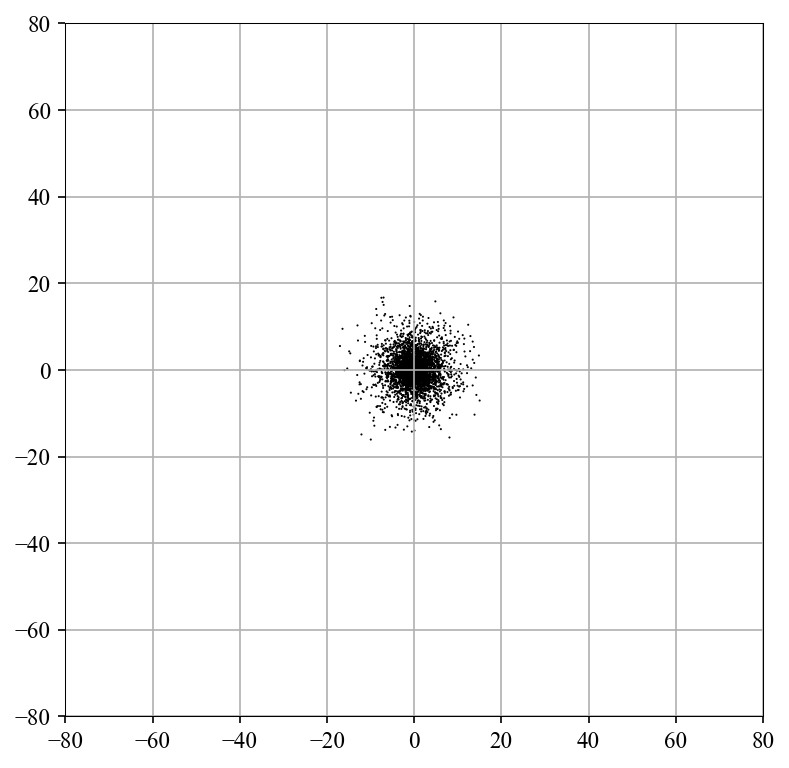

In [181]:
plt.figure(figsize=(6,6), dpi=150)

# plt.scatter(*Plummer_IC['vel'].T[::2], s=1)
plt.scatter(*sat1['vel'].T[::2], s=1)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-80, 80)

In [182]:
simNFW = Simulation(dt=dt, eps=0.5*u.pc)
simNFW.add_IC(sat1)

In [183]:
simNFW.run(n_steps)

In [184]:
snap = simNFW.pyn_snap(timestep=-1)

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 6.000e+00, 5.000e+00, 7.000e+00, 2.400e+01,
        6.100e+01, 3.488e+03, 1.470e+02, 3.100e+01, 1.200e+01, 1.000e+00,
        0.000e+00, 5.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-44530.28547506, -42793.6404012 , -41056.99532733, -39320.35025346,
        -37583.70517959, -35847.06010572, -34110.41503185, -32373.76995798,
        -30637.12488411, -28900.47981024, -27163.83473638, -25427.18966251,
        -23690.54458864, -21953.89951477, -20217.2544409 , -18480.60936703,
        -16743.96429316, -15007.31921929, -13270.67414542, -11534.029071

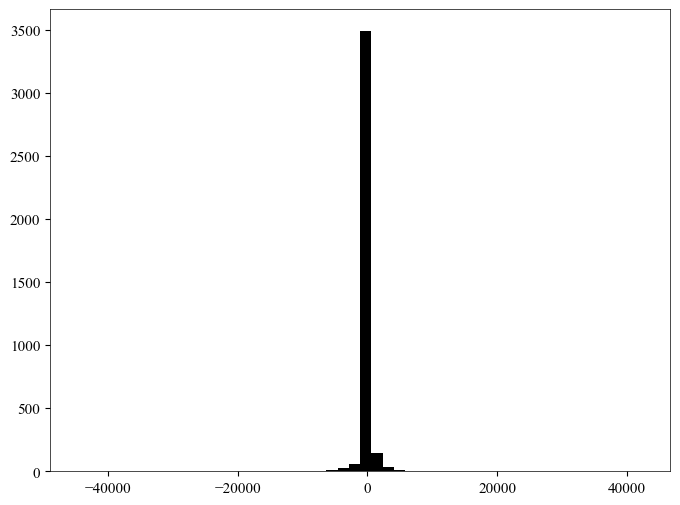

In [173]:
plt.hist(snap['x'], bins=50)

In [174]:
import plotly.graph_objects as go

# Get snapshots at regular intervals
n_frames = 20
frame_indices = np.linspace(0, len(simNFW.times) - 1, n_frames, dtype=int)

# Sample every nth particle
particle_step = 10

# Determine axis limits from all frames
all_coords = []
for idx in frame_indices:
    snap = simNFW.pyn_snap(timestep=idx)
    all_coords.extend(snap['x'][::particle_step])
    all_coords.extend(snap['y'][::particle_step])
    all_coords.extend(snap['z'][::particle_step])
max_range = max(abs(min(all_coords)), abs(max(all_coords)))

# Create frames for animation
frames = []
for i, idx in enumerate(frame_indices):
    snap = simNFW.pyn_snap(timestep=idx)
    x = snap['x'][::particle_step]
    y = snap['y'][::particle_step]
    z = snap['z'][::particle_step]
    
    frames.append(go.Frame(
        data=[go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(size=2, color='black', opacity=0.6)
        )],
        name=str(i)
    ))

# Initial data
snap_init = simNFW.pyn_snap(timestep=0)
x0 = snap_init['x'][::particle_step]
y0 = snap_init['y'][::particle_step]
z0 = snap_init['z'][::particle_step]

# Create figure
fig = go.Figure(
    data=[go.Scatter3d(
        x=x0, y=y0, z=z0,
        mode='markers',
        marker=dict(size=2, color='black', opacity=0.6)
    )],
    layout=go.Layout(
        title='Plummer Sphere Evolution',
        scene=dict(
            xaxis_title='x (kpc)',
            yaxis_title='y (kpc)',
            zaxis_title='z (kpc)',
            xaxis=dict(range=[-5, 5]),
            yaxis=dict(range=[-5, 5]),
            zaxis=dict(range=[-5, 5]),
            aspectmode='cube'
        ),
        updatemenus=[dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(label='Play',
                     method='animate',
                     args=[None, dict(frame=dict(duration=100, redraw=True),
                                      fromcurrent=True, mode='immediate')]),
                dict(label='Pause',
                     method='animate',
                     args=[[None], dict(frame=dict(duration=0, redraw=False),
                                        mode='immediate')])
            ]
        )],
        sliders=[dict(
            steps=[dict(method='animate',
                        args=[[str(i)], dict(mode='immediate',
                                             frame=dict(duration=100, redraw=True))],
                        label=str(i)) for i in range(len(frames))],
            active=0,
            transition=dict(duration=0),
            currentvalue=dict(prefix='Frame: ')
        )]
    ),
    frames=frames
)

fig.show()

In [125]:
max_range


53436.739644470545

# Disk

In [ ]:
def force_centers(positions, velocities, center_pos=None, center_vel=None, force_origin=True):
    """Move positions and velocities to have the desired center of mass position and mean velocity.
    
    Parameters
    ----------
    positions : array of Quantities of dimension length
        (Np,3) array of particle positions
    velocities : array of Quantities of dimension velocity
        (Np,3) array of particle velocities
    center_pos : 3 element array-like Quantity, optional
        Force the center of mass of the IC to be at this position
    center_vel : 3 element array-like Quantity, optional
        Force the mean velocity of the IC to have this velocity
    force_origin : bool
        Force the center of mass to be at the origin and the mean velocity to be zero;
        equivalent to setting center_pos=np.array([0,0,0])*u.kpc and
        center_vel=np.array([0,0,0])*u.km/u.s. Default is True unless center_pos and
        center_vel is set. If force_origin is True and only one of center_pos or
        center_vel is set, the other is set to zero.
        
    Returns
    -------
    newpositions : array of Quantities of dimension length
        New shifted positions
    newvelocities : array of Quantities of dimension velocity
        New shifted velocities
    """
    
    newpos = positions
    newvel = velocities
    
    if force_origin:
        if center_pos is None:
            center_pos = np.array([0,0,0])*u.kpc
        if center_vel is None:
            center_vel = np.array([0,0,0])*u.km/u.s
    if center_pos is not None:
        sampled_com = np.mean(positions, axis=0)
        dpos = center_pos - sampled_com
        newpos += dpos
    if center_vel is not None:
        sampled_cov = np.mean(velocities, axis=0)
        dvel = center_vel - sampled_cov
        newvel += dvel 

    return (newpos, newvel)

In [ ]:
def expdisk(sigma0=None, Rd=None, z0=None, sigmaR_Rd=None, external_rotcurve=None, N=None, \
        center_pos=None, center_vel=None, force_origin=True, seed=None):
        """Generates initial conditions of an exponential disk with a sech^2 vertical distribution that is
        in (very) approximate equilibrium: rho(R,z) = (sigma0 / 2 z0) exp(-R/Rd) sech^2(z/z0)
        
        Parameters
        ----------
        sigma0 : astropy Quantity with dimensions of surface density
            Central surface density
        Rd : astropy Quantity with dimensions of length
            Radial exponential scale length
        z0 : astropy Quantity with dimensions of length
            Vertical scale height
        sigmaR_Rd : astropy Quantity with dimensions of velocity
            Radial velocity dispersion at R=Rd
        external_rotcurve : function or None
            Function that returns the circular velocity of any external potential that contributes
            to the rotation curve aside from the disk itself. The function should accept input
            as an astropy Quantity of dimension length, and should return an astropy Quantity of
            dimension velocity.
        N : int
            Number of particles
        center_pos : 3 element array-like Quantity, optional
            Force the center of mass of the IC to be at this position
        center_vel : 3 element array-like Quantity, optional
            Force the mean velocity of the IC to have this velocity
        force_origin : bool
            Force the center of mass to be at the origin and the mean velocity to be zero;
            equivalent to setting center_pos=[0,0,0]*u.kpc and
            center_vel=[0,0,0]*u.km/u.s. Default is True unless center_pos and
            center_vel is set. If force_origin is True and only one of center_pos or
            center_vel is set, the other is set to zero.
        seed : {None, int, array_like[ints], SeedSequence, BitGenerator, Generator}, optional
            Seed to initialize random number generator to enable repeatable ICs.
            
        Returns
        -------
        IC : dict
           Properties of new particles to add, which sample the given distribution function. Contains
           the following key/value pairs:
           
           * **pos:** an array of positions
           * **vel:** an array of velocities
           * **mass:** an array of masses
           
           Each are astropy Quantities, with shape (Np,3).
           
        Example
        -------
        To create an exponential disk that is in a background logarithmic halo potential that
        generates a flat rotation curve of 200 km/s::
        
            particles = IC.expdisk(N=10000, sigma0=200*u.Msun/u.pc**2, Rd=2*u.kpc,
                z0=0.5*u.kpc, sigmaR_Rd=10*u.km/u.s,
                external_rotcurve=lambda x: 200*u.km/u.s)
                
        """
                
        rng = np.random.default_rng(seed)

        Rd_kpc = Rd.to(u.kpc).value
        totmass = (np.pi * Rd**2 * sigma0).to(u.Msun)

        # cylindrical radius transformation to give an exponential
        Rax = np.arange(0.001*Rd_kpc, 10*Rd_kpc, 0.01*Rd_kpc)
        R_cumprob = Rd_kpc**2 - Rd_kpc*np.exp(-Rax/Rd_kpc)*(Rax+Rd_kpc)
        R_cumprob /= R_cumprob[-1]
        probtransform = interp1d(R_cumprob, Rax)   # reverse interpolation
        # now get the uniform random deviate and transform it
        R_xi = rng.uniform(0.0, 1.0, size=N)
        R = probtransform(R_xi) * u.kpc
        # use random azimuth
        phi = rng.uniform(0.0, 2.0*np.pi, size=N)
        x = R * np.cos(phi)
        y = R * np.sin(phi)
        # get z from uniform random deviate
        z_xi = rng.uniform(0, 1.0, size=N)
        z = 2 * z0 * np.arctanh(z_xi)
        z *= (2 * (rng.uniform(0, 1, size=N) < 0.5)) - 1

        # the velocity dispersions go as:
        #  sigma_R = sigmaR_Rd * exp(-R/Rd)
        #  sigma2_phi = sigmaR^2 * kappa^2 / 4 Omega^2
        #  sigma2_z = pi G Sigma(R) z0 / 2
        # and the mean azimuthal velocity is
        #  <vphi> = vc
        

        def om2(rad):
            # Input must be in kpc but with units stripped, because it's passed into np.derivative.
            y_R = rad/(2.*Rd_kpc)
            # Disk contribution
            omega2 = np.pi * const.G * sigma0 / Rd * (special.iv(0,y_R)*special.kv(0,y_R) -
                    special.iv(1,y_R)*special.kv(1,y_R))
            # Halo contribution                   
            if external_rotcurve is not None:
                omega_halo = external_rotcurve(rad)#*u.kpc)*(u.km / u.s) / (rad*u.kpc)
                omega2 += omega_halo**2
                
            return omega2

        Omega2 = om2(R.to(u.kpc).value)
        kappa2 = 4.*Omega2 + R * np.gradient(om2(R.to(u.kpc).value)) / u.kpc

        sigma_R = sigmaR_Rd * np.exp(0.25*(1-R/Rd))
        sigma2_phi = sigma_R**2 * 4 * Omega2 / kappa2
        sigma2_z = np.pi * const.G * z0 * sigma0 * 0.5 * np.exp(-R/Rd)
        vphi_mean = (R * np.sqrt(Omega2)).to(u.km/u.s)

        vphi = np.sqrt(sigma2_phi).to(u.km/u.s) * rng.normal(size=N) + vphi_mean
        vR = sigma_R.to(u.km/u.s) * rng.normal(size=N)
        vx = -vphi * np.sin(phi) + vR * np.cos(phi)
        vy = vphi * np.cos(phi) + vR * np.sin(phi)
        vz = np.sqrt(sigma2_z).to(u.km/u.s) * rng.normal(size=N)

        m = np.ones((N)) * (totmass/N)
        
        # Force COM and/or COV
        positions, velocities = force_centers(np.vstack((x,y,z)).T, np.vstack((vx,vy,vz)).T, \
            center_pos=center_pos, center_vel=center_vel, force_origin=force_origin)
        
        outIC = {'pos':positions, 'vel':velocities, 'mass': m}
        return outIC




In [ ]:
# Set up an external NFW potential and an exponential disk that uses its rotation curve
from galpy import potential
from scipy.interpolate import interp1d
from astropy import constants as const
from scipy import special, integrate
NFWpot = potential.NFWPotential(amp=2e11*u.Msun, a=20*u.kpc)
potential.turn_physical_on(NFWpot)
expdisk_IC = expdisk(N=5000, sigma0=100*u.Msun/u.pc**2, Rd=2*u.kpc, z0=0.2*u.kpc, sigmaR_Rd=20*u.km/u.s,
    external_rotcurve=NFWpot.vcirc)
# Create a tracer particle to be particle 0
particle = {'pos':[3.5,0,0]*u.kpc, 'vel':[10,70,10]*u.km/u.s, 'mass':[1]*u.Msun}

# Create and run the simulation
sim = Simulation(dt=2*u.Myr, eps=0.1*u.kpc)
sim.add_IC(particle)
sim.add_IC(expdisk_IC)
sim.add_external_force(NFWpot)
sim.run(500)

# Plot the xy and xz trajectories of the tracer particle
fig = plt.figure(figsize=(10,4))
ax_xy = fig.add_subplot(121, aspect=1.0)
ax_xz = fig.add_subplot(122, aspect=1.0)
ax_xy.plot(sim.positions[:,0,0], sim.positions[:,0,1])
ax_xz.plot(sim.positions[:,0,0], sim.positions[:,0,2])
ax_xy.set_xlabel('x (kpc)')
ax_xy.set_ylabel('y (kpc)')
ax_xz.set_xlabel('x (kpc)')
ax_xz.set_ylabel('z (kpc)')

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions